## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

## Learning Resources

In [2]:
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/

## Importing Data

In [3]:
iPhone_df = pd.read_csv("iphone_smallmatrix_labeled_8d.csv")

Galaxy_df = pd.read_csv('galaxy_smallmatrix_labeled_9d.csv')

In [4]:
print(iPhone_df.shape)

print(Galaxy_df.shape)

(12973, 59)
(12911, 59)


In [5]:
iPhone_df.describe()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphonesentiment
count,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,...,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000
mean,2.148077,0.071148,0.024050,0.002312,0.137131,0.152316,0.039621,0.289601,0.053727,0.009944,...,0.002312,0.005550,0.064133,0.059200,0.038542,0.057581,0.058198,0.033069,0.016110,3.724505
std,5.664226,0.280869,0.171266,0.051144,4.223547,0.839081,0.255020,2.188978,0.711322,0.163251,...,0.086887,0.183249,0.829639,0.550736,0.426599,0.565341,0.586035,0.313733,0.285808,1.851348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,46.000000,8.000000,8.000000,2.000000,479.000000,6.000000,6.000000,156.000000,65.000000,8.000000,...,5.000000,13.000000,59.000000,26.000000,24.000000,20.000000,25.000000,10.000000,24.000000,5.000000


In [6]:
Galaxy_df.describe()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,galaxysentiment
count,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,...,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000
mean,2.209356,0.071335,0.024088,0.002324,0.137480,0.152738,0.039734,0.289133,0.053675,0.009682,...,0.002169,0.005577,0.064209,0.059484,0.038727,0.057858,0.058477,0.033227,0.016188,3.828518
std,6.071043,0.281264,0.171454,0.051266,4.233639,0.840622,0.255477,2.193111,0.712172,0.159829,...,0.085302,0.183688,0.831402,0.552041,0.427614,0.566683,0.587426,0.314477,0.286491,1.781224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,46.000000,8.000000,8.000000,2.000000,479.000000,6.000000,6.000000,156.000000,65.000000,8.000000,...,5.000000,13.000000,59.000000,26.000000,24.000000,20.000000,25.000000,10.000000,24.000000,5.000000


iPhone Sentiment range: min = 0.000000, max = 12973.000000

Galaxy Sentiment range: min = 0.000000, max = 12911.000000

## Data Visualisation

In [7]:
# Are there any missing values = False
iPhone_df.isnull().values.any()

False

In [8]:
Galaxy_df.isnull().values.any()

False

False = no missing values 

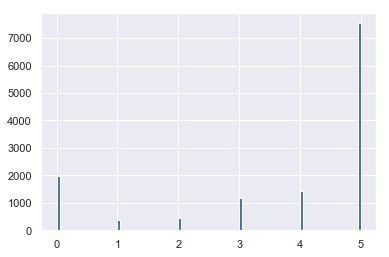

In [9]:
iPhone_df['iphonesentiment'].hist(bins = 100)

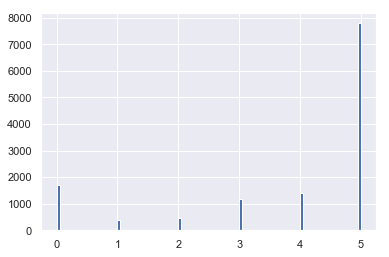

In [10]:
Galaxy_df['galaxysentiment'].hist(bins = 100)

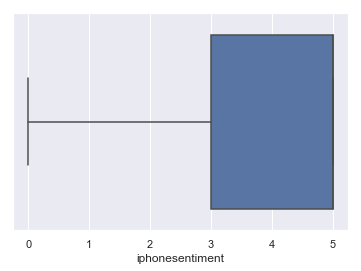

In [11]:
sns.boxplot(x=iPhone_df['iphonesentiment'])

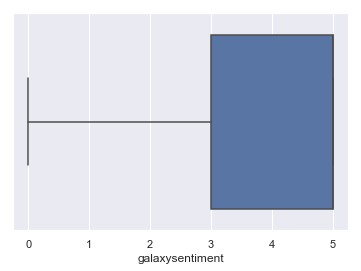

In [12]:
sns.boxplot(x=Galaxy_df['galaxysentiment'])

/Users/marilynannejelks/Environments/dev_env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


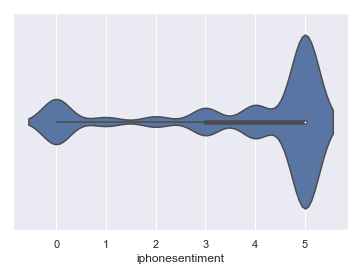

In [13]:
sns.violinplot(x=iPhone_df['iphonesentiment'])

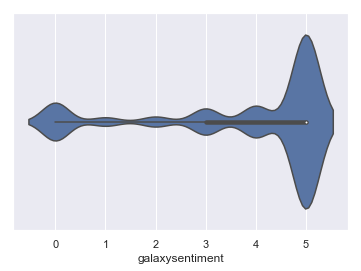

In [14]:
sns.violinplot(x=Galaxy_df['galaxysentiment'])

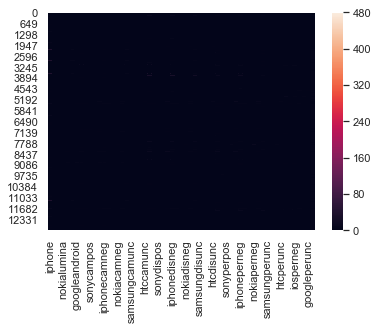

In [15]:
sns.heatmap(iPhone_df)

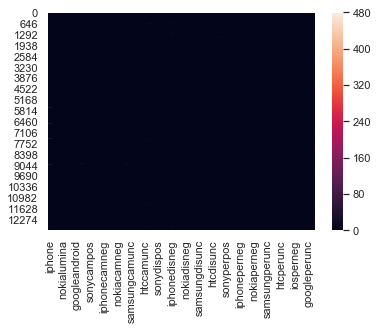

In [16]:
sns.heatmap(Galaxy_df)

## Data pre-processing

### Feature Selection using Random Forest = to remove unnecessary attributes

In [17]:
# Create set from dependant variable
y_iphone = iPhone_df['iphonesentiment'].values 

In [18]:
y_iphone

array([0, 0, 0, ..., 5, 5, 5])

In [19]:
y_galaxy = Galaxy_df['galaxysentiment'].values 

In [20]:
y_galaxy

array([5, 3, 3, ..., 4, 4, 5])

In [21]:
# Create set from independant variables 
x_iphone = iPhone_df.loc[:,iPhone_df.columns !='iphonesentiment'].values

In [22]:
x_galaxy = Galaxy_df.loc[:,Galaxy_df.columns !='galaxysentiment'].values

In [23]:
print(x_iphone)

print(x_galaxy)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [24]:
feat_labels_iphone = iPhone_df.loc[:,iPhone_df.columns !='iphonesentiment'].columns.values

In [25]:
feat_labels_iphone

array(['iphone', 'samsunggalaxy', 'sonyxperia', 'nokialumina', 'htcphone',
       'ios', 'googleandroid', 'iphonecampos', 'samsungcampos',
       'sonycampos', 'nokiacampos', 'htccampos', 'iphonecamneg',
       'samsungcamneg', 'sonycamneg', 'nokiacamneg', 'htccamneg',
       'iphonecamunc', 'samsungcamunc', 'sonycamunc', 'nokiacamunc',
       'htccamunc', 'iphonedispos', 'samsungdispos', 'sonydispos',
       'nokiadispos', 'htcdispos', 'iphonedisneg', 'samsungdisneg',
       'sonydisneg', 'nokiadisneg', 'htcdisneg', 'iphonedisunc',
       'samsungdisunc', 'sonydisunc', 'nokiadisunc', 'htcdisunc',
       'iphoneperpos', 'samsungperpos', 'sonyperpos', 'nokiaperpos',
       'htcperpos', 'iphoneperneg', 'samsungperneg', 'sonyperneg',
       'nokiaperneg', 'htcperneg', 'iphoneperunc', 'samsungperunc',
       'sonyperunc', 'nokiaperunc', 'htcperunc', 'iosperpos',
       'googleperpos', 'iosperneg', 'googleperneg', 'iosperunc',
       'googleperunc'], dtype=object)

In [26]:
feat_labels_galaxy = Galaxy_df.loc[:,Galaxy_df.columns !='galaxysentiment'].columns.values

In [27]:
feat_labels_galaxy

array(['iphone', 'samsunggalaxy', 'sonyxperia', 'nokialumina', 'htcphone',
       'ios', 'googleandroid', 'iphonecampos', 'samsungcampos',
       'sonycampos', 'nokiacampos', 'htccampos', 'iphonecamneg',
       'samsungcamneg', 'sonycamneg', 'nokiacamneg', 'htccamneg',
       'iphonecamunc', 'samsungcamunc', 'sonycamunc', 'nokiacamunc',
       'htccamunc', 'iphonedispos', 'samsungdispos', 'sonydispos',
       'nokiadispos', 'htcdispos', 'iphonedisneg', 'samsungdisneg',
       'sonydisneg', 'nokiadisneg', 'htcdisneg', 'iphonedisunc',
       'samsungdisunc', 'sonydisunc', 'nokiadisunc', 'htcdisunc',
       'iphoneperpos', 'samsungperpos', 'sonyperpos', 'nokiaperpos',
       'htcperpos', 'iphoneperneg', 'samsungperneg', 'sonyperneg',
       'nokiaperneg', 'htcperneg', 'iphoneperunc', 'samsungperunc',
       'sonyperunc', 'nokiaperunc', 'htcperunc', 'iosperpos',
       'googleperpos', 'iosperneg', 'googleperneg', 'iosperunc',
       'googleperunc'], dtype=object)

In [28]:
# Create a random forest classifier for iphone & galaxy
clf_iphone = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [29]:
clf_galaxy = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [30]:
# Train the classifier
clf_iphone.fit(x_iphone, y_iphone)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
clf_galaxy.fit(x_galaxy, y_galaxy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
# Print the name and gini importance of each feature
for feature in zip(feat_labels_iphone, clf_iphone.feature_importances_):
    print(feature)

('iphone', 0.20767563662932476)
('samsunggalaxy', 0.08292644361623637)
('sonyxperia', 0.02363261034981872)
('nokialumina', 0.00046021565955596885)
('htcphone', 0.06135880861432729)
('ios', 0.021487122263293912)
('googleandroid', 0.05636816168149349)
('iphonecampos', 0.032370162713218686)
('samsungcampos', 0.0038075653557148137)
('sonycampos', 0.0008925110647885057)
('nokiacampos', 0.00020942332457259)
('htccampos', 0.016133577197048044)
('iphonecamneg', 0.02663938670258994)
('samsungcamneg', 0.0014571740370663336)
('sonycamneg', 0.00017812878766302717)
('nokiacamneg', 0.0001595738345475928)
('htccamneg', 0.006000402965038773)
('iphonecamunc', 0.032122772085700045)
('samsungcamunc', 0.0028102877368799814)
('sonycamunc', 0.0003303266977532202)
('nokiacamunc', 9.571690941772418e-05)
('htccamunc', 0.004366159876042803)
('iphonedispos', 0.0666255125011188)
('samsungdispos', 0.004169202125587724)
('sonydispos', 0.0006951055590662761)
('nokiadispos', 0.00040838911012995924)
('htcdispos', 0.01

In [33]:
# Print the name and gini importance of each feature
for feature in zip(feat_labels_galaxy, clf_galaxy.feature_importances_):
    print(feature)

('iphone', 0.20255337968314324)
('samsunggalaxy', 0.08038695181461104)
('sonyxperia', 0.021782478646126126)
('nokialumina', 0.0005256085181272973)
('htcphone', 0.05929922372436331)
('ios', 0.021295374454235197)
('googleandroid', 0.052062915773967135)
('iphonecampos', 0.03316586163286276)
('samsungcampos', 0.003938224058138021)
('sonycampos', 0.001131308465891867)
('nokiacampos', 0.0003015905180254724)
('htccampos', 0.018261892545062067)
('iphonecamneg', 0.027254230951712408)
('samsungcamneg', 0.0015852799959090193)
('sonycamneg', 0.00020446729035333627)
('nokiacamneg', 0.00022600545181503877)
('htccamneg', 0.006864323372412969)
('iphonecamunc', 0.03273362720052216)
('samsungcamunc', 0.003164674225632619)
('sonycamunc', 0.00037763456625307195)
('nokiacamunc', 0.00019111641466806157)
('htccamunc', 0.005001063575414379)
('iphonedispos', 0.06414588141729528)
('samsungdispos', 0.004747832100575758)
('sonydispos', 0.001085852728908138)
('nokiadispos', 0.0005063747353220189)
('htcdispos', 0.0

In [34]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf_iphone, threshold=0.015)

# Train the selector
sfm.fit(x_iphone, y_iphone)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.015)

In [35]:
sfm = SelectFromModel(clf_galaxy, threshold=0.015)

# Train the selector
sfm.fit(x_galaxy, y_galaxy)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.015)

In [36]:
# Print the names of the most important features: iphone
iphone_names_feat = []
for feature_list_index in sfm.get_support(indices=True):
    iphone_names_feat.append(feat_labels_iphone[feature_list_index])
    print(feat_labels_iphone[feature_list_index])

iphone
samsunggalaxy
sonyxperia
htcphone
ios
googleandroid
iphonecampos
htccampos
iphonecamneg
iphonecamunc
iphonedispos
htcdispos
iphonedisneg
iphonedisunc
iphoneperpos
iphoneperneg
iphoneperunc


In [37]:
iPhone_x =iPhone_df[iphone_names_feat]

In [38]:
# Print the names of the most important features: galaxy
galaxy_names_feat = []
for feature_list_index in sfm.get_support(indices=True):
    galaxy_names_feat.append(feat_labels_galaxy[feature_list_index])
    print(feat_labels_galaxy[feature_list_index])

iphone
samsunggalaxy
sonyxperia
htcphone
ios
googleandroid
iphonecampos
htccampos
iphonecamneg
iphonecamunc
iphonedispos
htcdispos
iphonedisneg
iphonedisunc
iphoneperpos
iphoneperneg
iphoneperunc


In [39]:
Galaxy_x = Galaxy_df[galaxy_names_feat]

### Create A Data Subset With Only The Most Important Features

In [40]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
x_important_iphone = sfm.transform(x_iphone)

In [41]:
x_important_galaxy = sfm.transform(x_galaxy)

## Discretizing

In [42]:
stats.describe(y_iphone)

DescribeResult(nobs=12973, minmax=(0, 5), mean=3.724504740615124, variance=3.4274884322354655, skewness=-1.1706923771075137, kurtosis=-0.22176338726720246)

In [43]:
stats.describe(y_galaxy)

DescribeResult(nobs=12911, minmax=(0, 5), mean=3.8285183177135775, variance=3.1727606162213684, skewness=-1.2980988413752597, kurtosis=0.1480860434737905)

In [44]:
y_iphone_categorical = pd.cut(y_iphone, bins = 7, labels = ['very negative'
                            , 'negative'
                            , 'somewhat negative'
                            , 'neutral'
                            , 'somewhat positive'
                            , 'positive'
                            , 'very positive'])

In [45]:
y_galaxy_categorical = pd.cut(y_galaxy, bins = 7, labels = ["very negative"
                             , "negative"
                             , "somewhat negative"
                             , "neutral"
                             , "somewhat positive"
                             , "positive"
                             , "very positive"])

In [46]:
y_iphone_categorical

[very negative, very negative, very negative, very negative, very negative, ..., very positive, very negative, very positive, very positive, very positive]
Length: 12973
Categories (7, object): [very negative < negative < somewhat negative < neutral < somewhat positive < positive < very positive]

In [47]:
y_galaxy_categorical

[very positive, somewhat positive, somewhat positive, very negative, negative, ..., very positive, very positive, positive, positive, very positive]
Length: 12911
Categories (7, object): [very negative < negative < somewhat negative < neutral < somewhat positive < positive < very positive]

### Previewing Discretization

In [48]:
# Convert the array to a dataframe: iphone and galaxy
y_iphone_categorical_df = pd.DataFrame([y_iphone_categorical])

In [49]:
y_galaxy_categorical_df = pd.DataFrame([y_galaxy_categorical])

In [50]:
# Group by category to get the size of each bin
y_iphone_categorical_df_group = y_iphone_categorical_df.groupby(0).size()

In [51]:
y_galaxy_categorical_df_group = y_galaxy_categorical_df.groupby(0).size()

In [52]:
# Fetches category lables
categories = y_iphone_categorical_df[0].cat.categories

In [53]:
# An array of values representing each category, i.e display the bar graph
ind = np.array([x for x, _ in enumerate(categories)])
width = 0.35

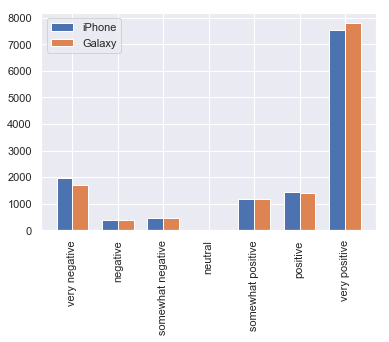

In [54]:
plt.bar(ind, y_iphone_categorical_df_group, width,  label= "iPhone")
plt.bar(ind + width, y_galaxy_categorical_df_group, width, label = "Galaxy")
plt.xticks(ind + width /2, categories)
plt.legend(loc = "best")
plt.xticks(rotation = 90)
plt.show()

## Model Development & Evaluation

In [55]:
print(iPhone_x.shape, Galaxy_x.shape)
print(y_iphone_categorical.shape,y_galaxy_categorical.shape)

(12973, 17) (12911, 17)
(12973,) (12911,)


In [56]:
iPhone_complete = iPhone_x
iPhone_complete['sentiment'] = y_iphone_categorical

/Users/marilynannejelks/Environments/dev_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
Galaxy_complete = Galaxy_x
Galaxy_complete['sentiment'] = y_galaxy_categorical

/Users/marilynannejelks/Environments/dev_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
from sklearn.model_selection import train_test_split

### Train/Test Split for iPhone

In [59]:
x_train_iphone, x_test_iphone, y_train_iphone, y_test_iphone = train_test_split(iPhone_complete.loc[:, iPhone_complete.columns != 'sentiment'], iPhone_complete['sentiment'], test_size=0.30, random_state=424)

In [60]:
x_train_iphone.shape

(9081, 17)

In [61]:
x_test_iphone.shape

(3892, 17)

### Train/Test Split for Galaxy

In [62]:
x_train_galaxy, x_test_galaxy, y_train_galaxy, y_test_galaxy = train_test_split(Galaxy_complete.loc[:, Galaxy_complete.columns != 'sentiment'], Galaxy_complete['sentiment'], test_size=0.30, random_state=424)

### Naive Bayes Classification: iPhone

In [63]:
from sklearn.naive_bayes import GaussianNB

In [163]:
gnb_iphone = GaussianNB() # Initialise the Model

In [164]:
gnb_iphone.fit(x_train_iphone, y_train_iphone) # Fitted the Model (to train model)

GaussianNB(priors=None, var_smoothing=1e-09)

In [165]:
# predicting against test(validation) set
y_iphone_pred = gnb_iphone.predict(x_test_iphone)

In [166]:
# Accuracy
accuracy = accuracy_score(y_test_iphone, y_iphone_pred)
print('Accuracy:{:.2f}'.format(accuracy))

# Kappa 
from sklearn.metrics import accuracy_score, cohen_kappa_score
kappa = cohen_kappa_score(y_test_iphone, y_iphone_pred)
print('Kappa:{:.2f}'.format(kappa))

Accuracy:0.14
Kappa:0.08


In [68]:
# Confusion Matrix: iPhone
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_iphone, y_iphone_pred)
print(cm)

[[ 121    3    0    1    0    4]
 [ 266  139    5    6    8    7]
 [  98    5   22    3    0    3]
 [ 232   10   34   54    4    4]
 [ 197    8    1  191  141   43]
 [2088   72   18   44    7   53]]


In [69]:
import seaborn as sn

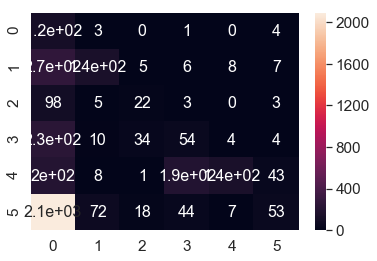

In [70]:
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16}) # font size

### Naive Bayes Classification: Galaxy

In [168]:
gnb_galaxy = GaussianNB() # Initialise the Model

In [169]:
gnb_galaxy.fit(x_train_galaxy, y_train_galaxy) # Fit Model (to train model)

GaussianNB(priors=None, var_smoothing=1e-09)

In [170]:
# predicting against test(validation) set
y_galaxy_pred = gnb_galaxy.predict(x_test_galaxy)

In [171]:
# Accuracy
accuracy = accuracy_score(y_test_galaxy, y_galaxy_pred)
print('Accuracy:{:.2f}'.format(accuracy))

# Kappa 
from sklearn.metrics import accuracy_score, cohen_kappa_score
kappa = cohen_kappa_score(y_test_galaxy, y_galaxy_pred)
print('Kappa:{:.2f}'.format(kappa))

Accuracy:0.13
Kappa:0.08


In [74]:
# Confusion Matrix: Galaxy
cm = confusion_matrix(y_test_galaxy, y_galaxy_pred)
print(cm)

[[ 117    5    1    0    2    0]
 [ 280  142    1    7   11    5]
 [ 121    1   15    0    1    1]
 [ 218    3   32   66    3    4]
 [ 244   11    1   70  134   36]
 [2213   76    4   21   14   14]]


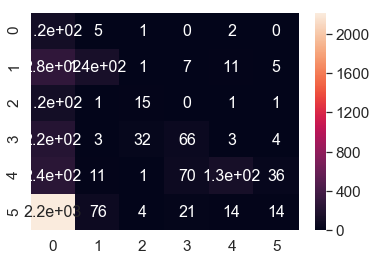

In [75]:
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16}) # font size

### KNN Classification: iPhone

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
neigh_iphone = KNeighborsClassifier(n_neighbors=3) # Initialise Model

In [173]:
neigh_iphone.fit(x_train_iphone.values, y_train_iphone.values) # Fit Model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [175]:
# predicting against test(validation) set
y_iphone_pred = neigh_iphone.predict(x_test_iphone)

In [176]:
# Accuracy
accuracy = accuracy_score(y_test_iphone, y_iphone_pred)
print('Accuracy:{:.2f}'.format(accuracy))

# Kappa 
from sklearn.metrics import accuracy_score, cohen_kappa_score
kappa = cohen_kappa_score(y_test_iphone, y_iphone_pred)
print('Kappa:{:.2f}'.format(kappa))

Accuracy:0.73
Kappa:0.50


In [81]:
# Confusion Matrix: Galaxy
cm = confusion_matrix(y_test_iphone, y_iphone_pred)
print(cm)

[[   1    5    0    0    0  123]
 [   8  146    2    5    8  262]
 [   5    3   23    1    0   99]
 [   2    9    0  222    3  102]
 [   3   12    1    7  367  191]
 [  40   93   16   44   13 2076]]


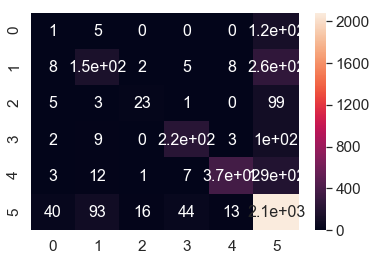

In [82]:
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16}) # font size

### KNN Classification: Galaxy

In [177]:
neigh_galaxy = KNeighborsClassifier(n_neighbors=3) # Initialise Model

In [178]:
neigh_galaxy.fit(x_train_galaxy.values, y_train_galaxy.values) # Fit Model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [179]:
# predicting against test(validation) set
y_galaxy_pred = neigh_galaxy.predict(x_test_galaxy)

In [180]:
# Accuracy
accuracy = accuracy_score(y_test_galaxy, y_galaxy_pred)
print('Accuracy:{:.2f}'.format(accuracy))

# Kappa 
from sklearn.metrics import accuracy_score, cohen_kappa_score
kappa = cohen_kappa_score(y_test_galaxy, y_galaxy_pred)
print('Kappa:{:.2f}'.format(kappa))

Accuracy:0.73
Kappa:0.49


In [86]:
# Confusion Matrix: Galaxy
cm = confusion_matrix(y_test_galaxy, y_galaxy_pred)
print(cm)

[[   2    6    1    1    2  113]
 [   1  152    6    9   12  266]
 [   1    6   18    2    2  110]
 [   4    5    2  200    3  112]
 [   1   12    4    3  337  139]
 [  20  107   31   37   27 2120]]


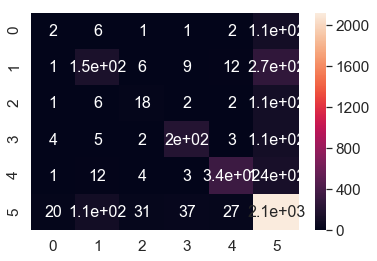

In [87]:
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16}) # font size

### Random Forest Classification: iPhone

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
# Initialise the model: to add parameters, i.e. no of estimator
RANDOM_STATE = np.random.RandomState(0)
rf_iphone = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE) 

In [182]:
rf_iphone.fit(x_train_iphone.values, y_train_iphone.values) # Fit Model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False,
            random_state=<mtrand.RandomState object at 0x1295e8dc8>,
            verbose=0, warm_start=False)

In [183]:
# predicting against test(validation) set
y_iphone_pred = rf_iphone.predict(x_test_iphone)

In [184]:
# Accuracy
accuracy = accuracy_score(y_test_iphone, y_iphone_pred)
print('Accuracy:{:.2f}'.format(accuracy))

# Kappa 
from sklearn.metrics import accuracy_score, cohen_kappa_score
kappa = cohen_kappa_score(y_test_iphone, y_iphone_pred)
print('Kappa:{:.2f}'.format(kappa))

Accuracy:0.77
Kappa:0.55


In [93]:
# Confusion Matrix: Galaxy
cm = confusion_matrix(y_test_iphone, y_iphone_pred)
print(cm)

[[   1    0    0    0    2  126]
 [   1  145    0    1    5  279]
 [   1    1   21    2    0  106]
 [   0    1    0  224    3  110]
 [   0    4    1    2  373  201]
 [   5   16    8   13   19 2221]]


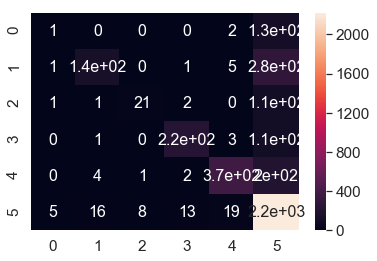

In [94]:
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16}) # font size

### Random Forest Classification: Galaxy

In [185]:
# Initialise the model: to add parameters, i.e. no of estimator
RANDOM_STATE = np.random.RandomState(0)
rf_galaxy = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE) 

In [186]:
rf_galaxy.fit(x_train_galaxy.values, y_train_galaxy.values) # Fit Model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False,
            random_state=<mtrand.RandomState object at 0x128c98438>,
            verbose=0, warm_start=False)

In [187]:
# predicting against test(validation) set
y_galaxy_pred = rf_galaxy.predict(x_test_galaxy)

In [188]:
# Accuracy
accuracy = accuracy_score(y_test_galaxy, y_galaxy_pred)
print('Accuracy:{:.2f}'.format(accuracy))

# Kappa 
from sklearn.metrics import accuracy_score, cohen_kappa_score
kappa = cohen_kappa_score(y_test_galaxy, y_galaxy_pred)
print('Kappa:{:.2f}'.format(kappa))

Accuracy:0.76
Kappa:0.52


In [98]:
# Confusion Matrix: Galaxy
cm = confusion_matrix(y_test_galaxy, y_galaxy_pred)
print(cm)

[[   1    0    1    2    1  120]
 [   0  140    1    6   10  289]
 [   1    0   15    0    3  120]
 [   2    1    0  202    3  118]
 [   0    5    1    2  342  146]
 [  10   36    7   27   24 2238]]


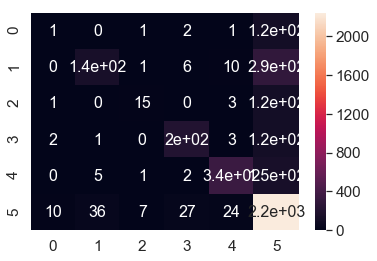

In [99]:
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16}) # font size

### SVM Classification: iPhone

In [100]:
from sklearn.svm import SVC

In [189]:
# Initialise Model
clf_iphone = SVC(gamma='auto')

In [190]:
clf_iphone.fit(x_train_iphone, y_train_iphone) # Fit Model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [191]:
# predicting against test(validation) set
y_iphone_pred = clf_iphone.predict(x_test_iphone)

In [192]:
# Accuracy
accuracy = accuracy_score(y_test_iphone, y_iphone_pred)
print('Accuracy:{:.2f}'.format(accuracy))

# Kappa 
from sklearn.metrics import accuracy_score, cohen_kappa_score
kappa = cohen_kappa_score(y_test_iphone, y_iphone_pred)
print('Kappa:{:.2f}'.format(kappa))

Accuracy:0.76
Kappa:0.52


In [105]:
# Confusion Matrix: iPhone
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_iphone, y_iphone_pred)
print(cm)

[[   0    0    0    0    0  129]
 [   0  115    0    1    6  309]
 [   0    0   18    3    0  110]
 [   0    1    0  216    2  119]
 [   0    5    0    5  360  211]
 [   0    5    0   23    9 2245]]


In [106]:
import seaborn as sn

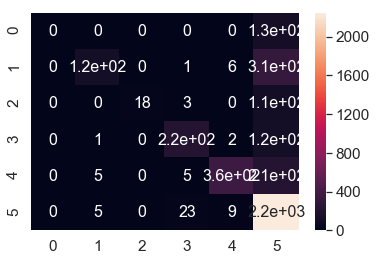

In [107]:
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16}) # font size

### SVM Classification: Galaxy

In [193]:
# Initialise Model
clf_galaxy = SVC(gamma='auto')

In [194]:
clf_galaxy.fit(x_train_galaxy, y_train_galaxy) # Fit Model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [195]:
# predicting against test(validation) set
y_galaxy_pred = clf_galaxy.predict(x_test_galaxy)

In [196]:
# Accuracy
accuracy = accuracy_score(y_test_galaxy, y_galaxy_pred)
print('Accuracy:{:.2f}'.format(accuracy))

# Kappa 
from sklearn.metrics import accuracy_score, cohen_kappa_score
kappa = cohen_kappa_score(y_test_galaxy, y_galaxy_pred)
print('Kappa:{:.2f}'.format(kappa))

Accuracy:0.76
Kappa:0.50


In [111]:
# Confusion Matrix: Galaxy
cm = confusion_matrix(y_test_galaxy, y_galaxy_pred)
print(cm)

[[   0    0    0    0    1  124]
 [   0  125    1    3   10  307]
 [   0    1   15    1    0  122]
 [   0    1    0  190    2  133]
 [   0    3    1    1  332  159]
 [   0   11    0   39   26 2266]]


In [112]:
import seaborn as sn

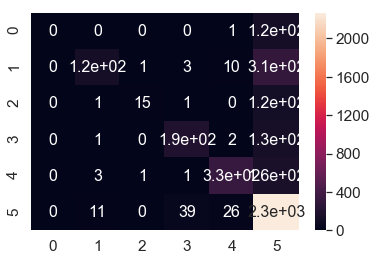

In [113]:
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16}) # font size

## Import LargeMatrix

In [114]:
iPhone_large_df = pd.read_csv("iPhoneLargeMatrix.csv")

Galaxy_large_df = pd.read_csv('GalaxyLargeMatrix.csv')

In [116]:
print(iPhone_large_df.shape)

print(Galaxy_large_df.shape)

(6986, 60)
(6986, 60)


In [117]:
iPhone_large_df.describe()

,id,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphoneSentiment
count,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,...,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.00000,6986.000000,6986.000000
mean,3492.500000,0.859290,0.080447,0.016461,0.002433,0.041798,0.549098,0.079445,0.137561,0.026768,...,0.016605,0.031635,0.022330,0.386630,0.124248,0.356857,0.162182,0.34655,0.106069,3.580447
std,2016.828823,1.191997,0.481406,0.229252,0.054777,0.228842,1.057249,0.523042,1.046028,0.422013,...,0.885424,0.975286,0.364596,2.885967,1.514433,2.815830,1.841666,3.50988,1.426731,25.301575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-175.000000
25%,1746.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,3492.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,5238.750000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,6985.000000,15.000000,14.000000,11.000000,2.000000,5.000000,32.000000,26.000000,38.000000,20.000000,...,60.000000,60.000000,9.000000,65.000000,60.000000,47.000000,47.000000,189.00000,57.000000,630.000000


In [118]:
Galaxy_large_df.describe()

,id,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,galaxySentiment
count,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,...,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6986.00000,6986.000000,6986.000000
mean,3492.500000,0.859290,0.080447,0.016461,0.002433,0.041798,0.549098,0.079445,0.137561,0.026768,...,0.016605,0.031635,0.022330,0.386630,0.124248,0.356857,0.162182,0.34655,0.106069,0.317063
std,2016.828823,1.191997,0.481406,0.229252,0.054777,0.228842,1.057249,0.523042,1.046028,0.422013,...,0.885424,0.975286,0.364596,2.885967,1.514433,2.815830,1.841666,3.50988,1.426731,13.116256
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-157.000000
25%,1746.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,3492.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,5238.750000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,6985.000000,15.000000,14.000000,11.000000,2.000000,5.000000,32.000000,26.000000,38.000000,20.000000,...,60.000000,60.000000,9.000000,65.000000,60.000000,47.000000,47.000000,189.00000,57.000000,630.000000


### Applying Feature Selection

In [119]:
iPhone_large_x =iPhone_large_df[iphone_names_feat]

In [121]:
Galaxy_large_x =Galaxy_large_df[galaxy_names_feat]

### Predict with Random Forest Classification

In [199]:
# predicting against test(validation) set
y_iphone_large_pred = rf_iphone.predict(iPhone_large_x)

In [200]:
# Created a dataframe of the predictions
y_iphone_large_pred_df = pd.DataFrame(y_iphone_large_pred)
y_iphone_large_pred_df.columns = ['prediction']

In [201]:
y_galaxy_large_pred = rf_galaxy.predict(Galaxy_large_x)

In [202]:
# Created a dataframe of the predictions
y_galaxy_large_pred_df = pd.DataFrame(y_galaxy_large_pred)
y_galaxy_large_pred_df.columns = ['prediction']

In [203]:
# Groupy by each prediction type, count the number of times it occurred
y_iphone_large_pred_df_plot = y_iphone_large_pred_df.groupby('prediction').size()

In [204]:
y_galaxy_large_pred_df_plot = y_galaxy_large_pred_df.groupby('prediction').size()

In [205]:
y_iphone_large_pred_df_plot

prediction
negative                1
positive              112
somewhat negative     199
somewhat positive     462
very negative        2796
very positive        3416
dtype: int64

In [206]:
y_galaxy_large_pred_df_plot

prediction
negative                5
positive              534
somewhat negative     218
somewhat positive     441
very negative        2778
very positive        3010
dtype: int64

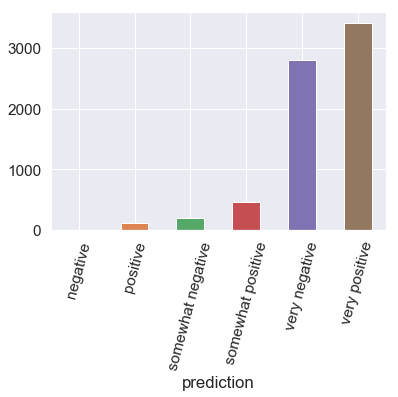

In [207]:
y_iphone_large_pred_df_plot.plot.bar(rot=75)

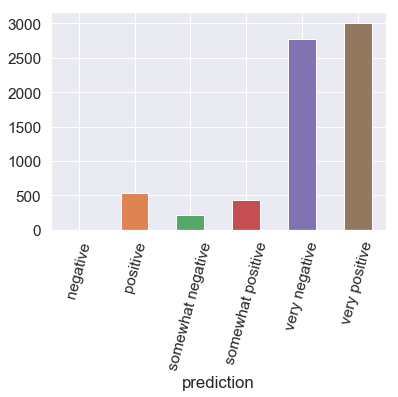

In [208]:
y_galaxy_large_pred_df_plot.plot.bar(rot=75)